<a href="https://colab.research.google.com/github/Mirian-9/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: Solicita a prompt Gemeni que armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible subjects
subjects = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Física', 'Química', 'Biología', 'Arte', 'Música', 'Tecnología']

# Function to generate random grades
def random_grade():
  return random.randint(1, 10)

# Function to generate random absences
def random_absences():
  return random.randint(0, 20)

# Create a list of dictionaries to store the data
data = []
for _ in range(100):
    data.append({
        'Apellido': 'Apellido' + str(random.randint(1, 100)),
        'Nombre': 'Nombre' + str(random.randint(1, 100)),
        'Nro_DNI': random.randint(10000000, 99999999),
        'Materia escolar': random.choice(subjects),
        'nota 1er Trimestre': random_grade(),
        'nota 2do Trimestre': random_grade(),
        'nota 3er Trimestre': random_grade(),
        'Faltas a clases': random_absences()
    })

# Create the DataFrame
df = pd.DataFrame(data)
df

,Apellido,Nombre,Nro_DNI,Materia escolar,nota 1er Trimestre,nota 2do Trimestre,nota 3er Trimestre,Faltas a clases
0,Apellido45,Nombre27,93228299,Música,3,10,10,19
1,Apellido94,Nombre37,30430845,Biología,7,9,10,5
2,Apellido12,Nombre64,19184585,Música,3,5,2,16
3,Apellido38,Nombre76,42226380,Historia,5,4,7,9
4,Apellido39,Nombre74,41206156,Lengua y Literatura,2,4,8,14
...,...,...,...,...,...,...,...,...
95,Apellido2,Nombre72,98840299,Ciencias Naturales,9,5,5,10
96,Apellido19,Nombre7,57867381,Música,9,4,2,12
97,Apellido86,Nombre39,83050849,Historia,9,6,1,17
98,Apellido72,Nombre87,68394227,Música,10,5,4,8


<ipython-input-2-377e32686871>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=average_grades.index, y=average_grades.values, palette='viridis')
<ipython-input-2-377e32686871>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


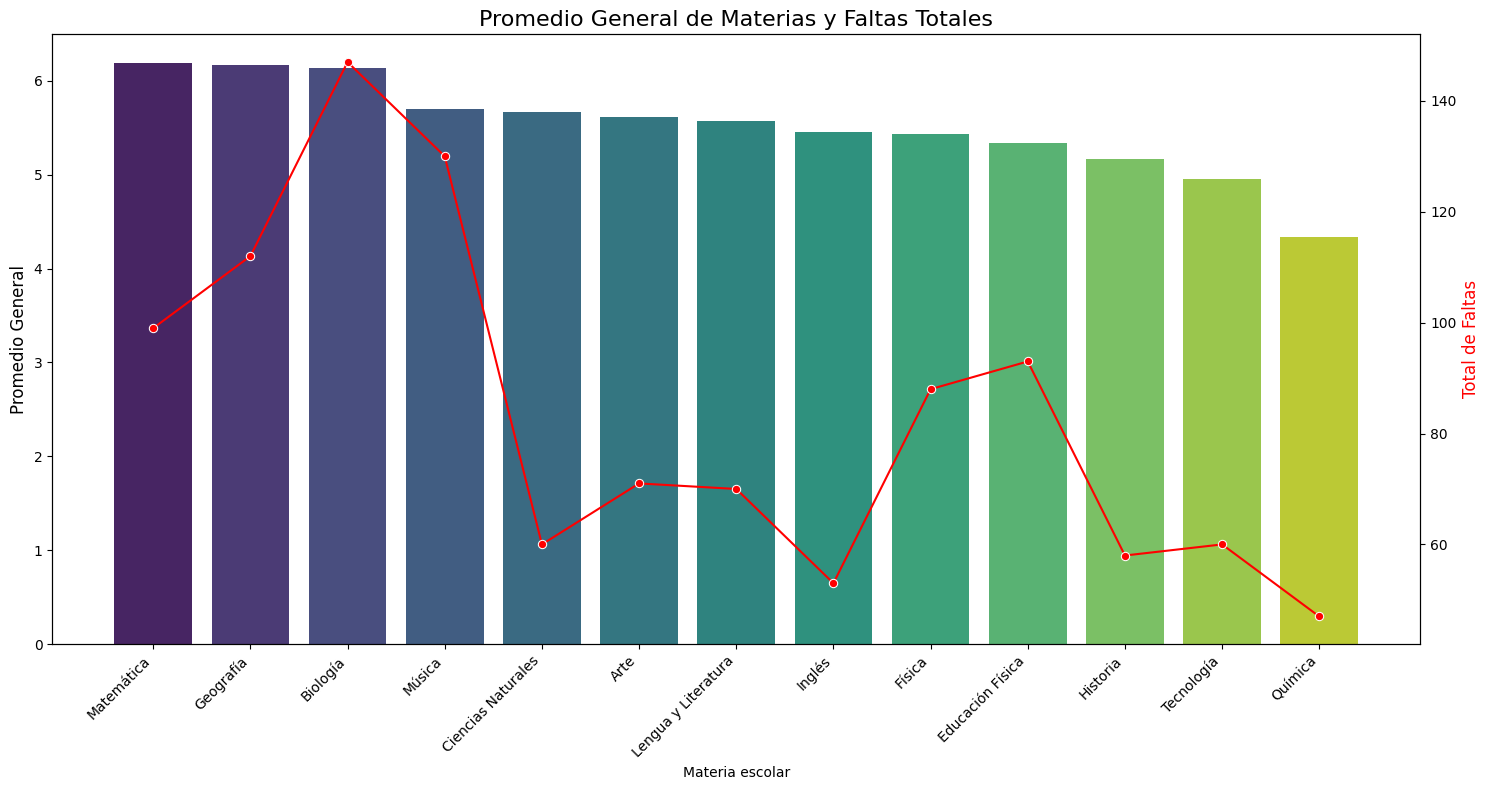

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average grade for each subject
average_grades = df.groupby('Materia escolar')[['nota 1er Trimestre', 'nota 2do Trimestre', 'nota 3er Trimestre']].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia escolar')['Faltas a clases'].sum()

# Create the bar plot
plt.figure(figsize=(15, 8))
ax1 = sns.barplot(x=average_grades.index, y=average_grades.values, palette='viridis')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add the absences as a second y-axis
ax2 = ax1.twinx()
sns.lineplot(x=total_absences.index, y=total_absences.values, color='red', marker='o', ax=ax2)

# Add labels and title
plt.title('Promedio General de Materias y Faltas Totales', fontsize=16)
plt.xlabel('Materia', fontsize=12)
ax1.set_ylabel('Promedio General', fontsize=12)
ax2.set_ylabel('Total de Faltas', fontsize=12, color='red')

# Show the plot
plt.tight_layout()
plt.show()

In [3]:
# prompt:  csv df.to_csv("datos_alumnos.csv", index=False)

df.to_csv("datos_alumnos.csv", index=False)